# Большое практическое задание 1
# Классификация изображений цифр метрическими методами

## курс "Машинное обучение 1", программа OzonMasters, 2021

## Студент: Солоднёва Екатерина Алексеевна

## Введение

Данное задание направлено на ознакомление с метрическими алгоритмами классификации, а также методами работы с изображениями. В задании вам будет необходимо:

1. Написать на языке Python собственные реализации метода ближайших соседей и кросс-валидации. Реализации должны соответствовать спецификации, описанной в прилагающихся модулях.     
    Частично проверить правильность выполнения своих реализаций можно с помощью системы ejudge в соответствующем соревновании.
    **Внимание.** Прохождение всех тестов в соревновании не гарантирует правильность решения.


2. Провести описанные ниже эксперименты с датасетом изображений цифр MNIST, описать полученые результаты и ответить на предложенные вопросы.


3. Подготовить отчёт о проделанной работе. Удалите черновые выводы, оставьте только тот код, который является ответом к пунктам задания. Сохраните ноутбук в форматах .ipynb и .html одновременно.

    **Замечание.** Чтобы экспорировать jupyter notebook в .html нужно выбрать:
    `File -> Download as -> HTML (.html).`
    Для экспорта notebook в .html в Google Colab, воспользуйтесь [следующим кодом](https://gist.github.com/vbugaevskii/b9c6181f2ad83e11f5b9c92d315cb2de).
Большая просьба: подписывайте свой отчет (в названии файла и внутри ноутбука).


4. В систему проверки необходимо сдать отчёт в обоих форматах и .zip архив с написанными модулями.

    Большая просьба: jupyter notebook и html файл не запаковывать в архив, а сдавать отдельно.

### Некоторые полезные советы

1. Для того, чтобы не перезагружать jupyter notebook каждый раз после того, как вы внесли изменения в модуль `knn`, можно добавить ячейку с таким содержимым:
     
```
    %load_ext autoreload
    
    %autoreload 2
```
   
2. Не нужно копировать свой код из модулей в jupyter notebook, пользуйтесь им, как если бы это была библиотека. Для этого поместите директорию `knn` рядом с notebook-ом. Пример, как может выглядеть содержимое вашей рабочей директории:

```
    tree
    ---knn
    ------__init__.py
    ------classification.py
    ------distances.py
    ------model_selection.py
    ------nearest_neighbors.py
    ---tests
    ------__init__.py
    ------test_classification.py
    ------test_distances.py
    ------test_model_selection.py
    ------test_nearest_neigbours.py
    experiments.ipynb
```

## Реализация алгоритмов (10 баллов)

Прототипы функций должны строго соответствовать прототипам, описанным в спецификации и проходить
все выданные тесты. Задание, не проходящее все выданные тесты, приравнивается к невыполненному. При
написании **необходимо пользоваться** стандартными средствами языка Python и библиотекой numpy. Библиотеками scipy и scikit-learn пользоваться **запрещено**, если это не обговорено отдельно в пункте задания. Для
экспериментов в бонусной части разрешается пользоваться любыми открытыми библиотеками, реализующими
алгоритмы обработки изображений.

Среди предоставленных файлов должны быть следующие модули и функции в них

1. Модуль `knn.distances` с реализацией функции для вычисления расстояния:
    1. `euclidean_distance(X, Y)` — реализация евклидова расстояния с заданными свойствами;
    2. `cosine_distance(X, Y)` — реализация косинусного расстояния с заданными свойствами;


2. Модуль `knn.nearest_neighbors`, содержащий собственную реализацию поиска ближайших соседей.
    
    Класс `NearestNeighborsFinder` с методами:
      1. `__init__(self, n_neighbors, metric="euclidean")` — конструктор (инициализатор) класса;
      2. `fit(self, X, y=None)` — обучение алгоритма;
      3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей.


3. Модуль `knn.classification`, содержащий собственную реализацию классификатора на основе метода ближайших соседей.

    Класс `KNNClassifier` с методами:
    
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’)` — конструктор (инициализатор) класса;
    2. `fit(self, X, y=None)` — обучение алгоритма;
    3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей;
    4. `predict(self, X)` — редсказание на новых данных;
    5. `_predict_precomputed(self, indices, distances)` — вспомогательный метод.
    
   Класс `BatchedKNNClassifier`, полезный для работы с большими выборками, с методами:
   
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’, batch_size=None)` — конструктор (инициализатор) класса
    2. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей, разбитый на несколько итераций по батчам
    3. `set_batch_size(self, batch_size)` — метод для выставления нового значения размера батча


4. Модуль `knn.model_selection` с реализациями функций для применения кросс-валидации:

    1. `knn_cross_val_score(X, y, k_list, scoring, cv=None, **kwargs)` — функция для измерения качества на кросс-валидации.

Ожидается, что реализациия всех классов и функций будет максимально эффективной. Дополнительно вам предоставлены открытые unit-тесты, которые находятся рядом с модулем `knn` в директории `tests` Чтобы запустить тесты в консоли требуется выполнить одну из команд:


```
$ python -m unittest                            # запуск всех тестов
$ python -m unittest tests/test_distances.py    # запуск конкретных тестов
```

## Эксперименты (15 баллов)

Здесь вы можете заимпортировать всё, что вам потребуется для экспериментов:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

from sklearn import datasets
from sklearn.model_selection import train_test_split

from knn.distances import euclidean_distance, cosine_distance 
from knn.classification import BatchedKNNClassifier
from knn.model_selection import knn_cross_val_score

import sklearn
from sklearn.model_selection import LeaveOneOut, KFold, cross_val_score

import pandas as pd
import time
from itertools import chain
from sklearn.metrics import accuracy_score


In [4]:
%load_ext autoreload

%autoreload 2

In [5]:
#plt.xkcd()
#from IPython.display import Audio
#sound_file = 'kagebunshin.mp3'

### 1. Загрузка даннных

Эксперименты этого задания необходимо проводить на датасете MNIST. Загрузить датасет можно при помощи функции `sklearn.datasets.fetch_openml("mnist_784")` или скачать вручную с сайта
http://yann.lecun.com/exdb/mnist/. Датасет необходимо разбить на обучающую выборку (первые 60 тыс.
объектов) и тестовую выборку (10 тыс. последних объектов).

In [6]:
data = sklearn.datasets.fetch_openml("mnist_784")

In [7]:
y = data['target'].values
X = data['data'].values
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000].astype(int), y[60000:].astype(int)

### 2. Исследование скорости методов поиска (4 балла)

Исследуйте, какой алгоритм поиска ближайших соседей будет быстрее работать в различных ситуациях.

Измерьте для каждого алгоритма поиска (`kd_tree`, `ball_tree`, `brute` и `my_own`) время нахождения 5 ближайших соседей для каждого объекта тестовой выборки по евклидовой метрике. Выберите подмножество признаков, по которому будет считаться расстояние, размера 10, 20, 100 (подмножество признаков выбирается один раз для всех объектов, случайно).

**Замечание.** Для оценки времени долго работающих функций можно пользоваться либо функциями из
модуля time, либо magic-командой %time, которая запускает код лишь один раз.

In [9]:
k = 5
alg_list = ['kd_tree', 'ball_tree', 'brute', 'my_own']
#alg_list = ['my_own']
feat_list = [10, 20, 100]
time_d = {i: [] for i in alg_list}

for f in feat_list:
    seed = np.random.RandomState(1337)
    X_train_cur = X_train[:, seed.randint(X_train.shape[1], size=f)]
    X_test_cur = X_test[:, seed.randint(X_train.shape[1], size=f)]
    for alg in alg_list:
        clf = BatchedKNNClassifier(n_neighbors=k, algorithm=alg, metric='euclidean', weights='distance', batch_size = 100)
        clf.fit(X_train_cur, y_train)
        start_time = time.time()
        y_pred = clf.predict(X_test_cur)
        end_time = time.time()
        time_d[alg].append(end_time - start_time)

In [16]:
time_d

{'kd_tree': [12.830112218856812, 41.154985427856445, 224.2512719631195],
 'ball_tree': [29.86233687400818, 93.99680662155151, 269.01930141448975],
 'brute': [42.111525774002075, 61.93624663352966, 48.95767855644226],
 'my_own': [86.33055353164673, 114.80810475349426, 81.94280219078064]}

#### Приведите график / таблицу с результатами вашего эксперимента

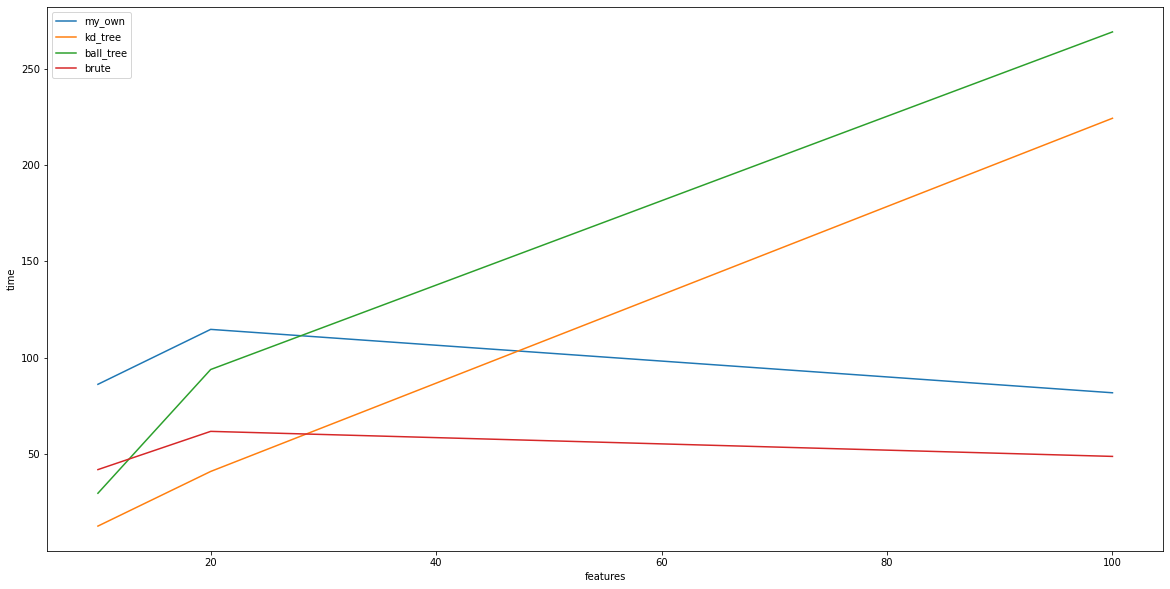

In [17]:
x = feat_list

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, time_d['my_own'], label='my_own')  # Plot some data on the axes.
ax.plot(x, time_d['kd_tree'], label='kd_tree')  # Plot more data on the axes...
ax.plot(x, time_d['ball_tree'], label='ball_tree') 
ax.plot(x, time_d['brute'], label='brute') # ... and some more.
ax.set_xlabel('features')  # Add an x-label to the axes.
ax.set_ylabel('time')  # Add a y-label to the axes.
ax.set_title("")  # Add a title to the axes.
ax.legend()  # Add a legend.


#### Ответьте на следующие вопросы

1. Какой алгоритм сработал быстрее всего для каждого из размера подвыборок? Ожидали ли вы такие результаты до проведения эксперимента?

 Лучше всего себя показал алгоритм brute. Не ожидала, что мой алгоритм работает всего в 2-3 раза медленнее чем алгоритм, написанный специалистами. В моём алгоритме самой долгой процедурой является перемножение матриц, когда считается расстояние. Не смотря на то, что у меня функция поиска евклидова расстояния между объектами написана с помощью методов numpy и с использованием предподсчёта, она всё равно имеет околокубическую сложность. Наверняка те, кто писал knn в sklearn, сумел оптимизировать поиск расстояний ещё лучше. Куда уж говорить об остальных модулях.

2. Приведите теоретическую сложность каждого из алгоритмов поиска. Согласуется ли время работы алгоритмов на практике с их теоретической вычислительной сложностью? Как вы думаете, почему?

- Сложность моего алгоритма KNNClassifier: $\mathcal{O}((N+M)D+NMD+N+KlogK+NM) = \mathcal{O}(N M D)$, где $D$ - размерность признакового пространства, $K$ - количество соседей, $N, M$ - количество векторов в обучающей и тестовой выборке соответственно. Сложность BatchedKNNClassifier считается через вышеприведённую, где каждый из размеров $N,M$ надо поделить на batch_size, но и получившуюся сложность умножить на количество разбиений, таким образом асимптотическая сложность выходит такая же. <br>
- KDTree - $\mathcal{O}(DN\log N)$
- brute - $\mathcal{O}(kDN)$
- ball_tree - $\mathcal{O}(DN\log N)$ <br>
(Источник: https://towardsdatascience.com/k-nearest-neighbors-computational-complexity-502d2c440d5)

Как видно из асимптотик, время работы не согласуется с теорией, так как на графике явно заметно, что время работы алгоритмов my_own, brute не зависит от размерности признакового пространства. Это обусловлено тем, что перемножение матриц в numpy сделано очень эффективно и почти не зависит от K для матриц размера $MxK, KxN$. 

3. Какой алгоритм исходя из результатов эксперимента следует использовать в дальнейшем? Выберите алгоритм поиска соседей, который вы будете использовать во всех экспериментах ниже. 

- Быстрее всего исходя из результатов будет работать brute алгоритм. 
- Я буду использовать свой, так как не зря его писала и так как его можно без большой потери времени использовать на всём признаковом пространстве.

### 3. Исследование зависимости точности алгоритма на кросс-валидации (4 балла)


Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) алгоритма k ближайших соседей в зависимости от следующих факторов:
* количество соседей k от 1 до 10
* используется евклидова или косинусная метрика

In [11]:
algorithm = 'my_own'

In [17]:
%%time
meta_list = [i for i in range(1, 11)] 
cv = KFold(n_splits=3, shuffle=True, random_state=1337)
x, y = X_train, y_train
scores_pred_euclid = knn_cross_val_score(x, y, k_list=meta_list, cv=cv, scoring='accuracy',
                                         metric='euclidean', algorithm = algorithm, batch_size=100)


Wall time: 4min 7s


In [18]:
scores_pred_cos = knn_cross_val_score(x, y, k_list=meta_list, cv=cv, scoring='accuracy',
                                      metric='cosine', algorithm = algorithm, batch_size=100)


#### Нарисуйте график зависимости точности от количества соседей по каждой метрике

In [19]:
euclid_accuracy = [scores_pred_euclid[i].mean() for i in range(1,11)]
cos_accuracy = [scores_pred_cos[i].mean() for i in range(1,11)]

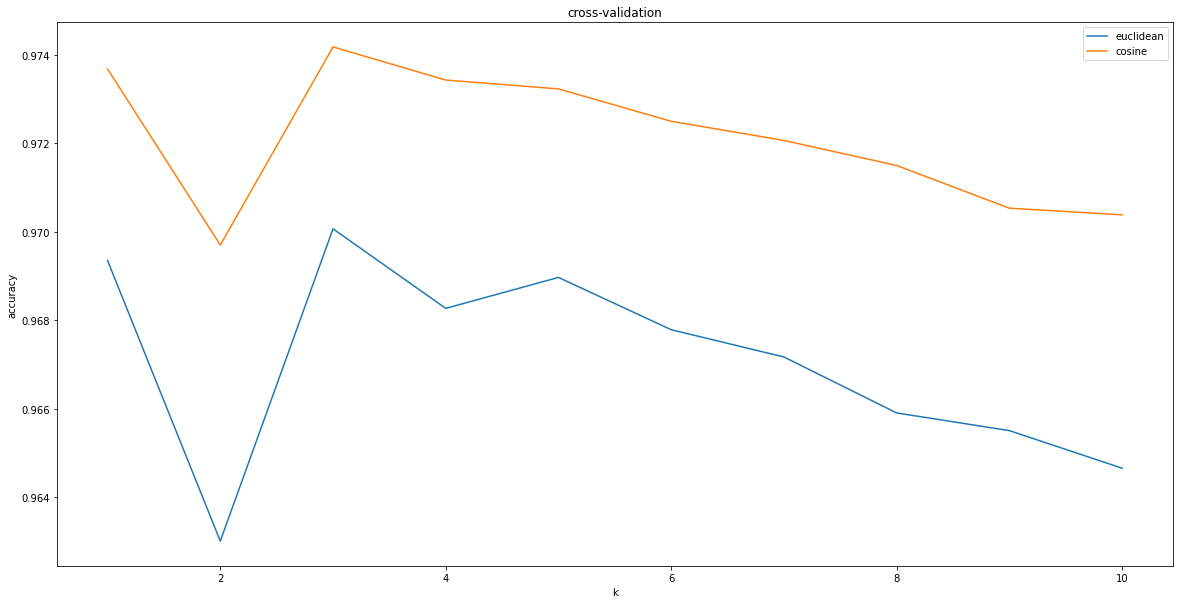

In [20]:
x = meta_list
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, euclid_accuracy, label='euclidean')  # Plot some data on the axes.
ax.plot(x, cos_accuracy, label='cosine')  # Plot more data on the axes...

ax.set_ylabel('accuracy')  # Add an x-label to the axes.
ax.set_xlabel('k')  # Add a y-label to the axes.
ax.set_title("cross-validation")  # Add a title to the axes.
ax.legend()  # Add a legend.


#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор (например, если у вас несколько наборов параметров с высоким качеством, обоснуйте как вы выберите среди этих наборов один).

   Косинусная метрика, как видно из графика, лучше работает для данного алгоритма. Наибольшая точность и там, и там достигается при количестве соседей, равном 3. Начиная с k=3 точность хоть незначительно, но уменьшается, а время работы увеличивается, поэтому стоит взять это значение.


2. Какая метрика лучше себя показала в экспериментах? Можете ли вы объяснить, почему?

    Косинусная метрика. Видимо объекты расположены так, что по углу между ними можно лучше определить где какой класс, чем если смотреть и на расстояние, и на угол. (Скорее всего, объекты распределены как-то по кругу.) 
    
   
3. Есть ли на графике зависимости точности от количество соседей "выбросы", резкие падения/повышения качества для одного значения k по сравнению с соседними? Если да, предположите причину появления этих выбросов.

    При k=2 в графиках обеих метрик достигается точка минимума, и при k=3 - точка максимума. Это следует из того, что при чётном числе соседей в алгоритме выбирается признак с минимальным значением, что также точно, как бросок монетки.

### 3. Исследование зависимости точности взвешенного алгоритма на кросс-валидации (4 балла)

По результатам предыдущего эксперимента выберите метрику, которую вы будете использовать в этом эксперименте.

Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) взвешенного алгоритма k ближайших соседей в зависимости от количество соседей k (от 1 до 10).

Голос объекта положите равным `1 / (distance + eps)`, где `eps` = `1e-5`.

In [29]:
metric = 'cosine'

In [30]:
%%time
meta_list = [i for i in range(1, 11)]
cv = KFold(n_splits=3, shuffle=True, random_state=1337)
x, y = X_train, y_train
scores_pred_cos = knn_cross_val_score(x, y, k_list=meta_list, cv=cv, scoring='accuracy',
                                         metric=metric, weights='distance', algorithm=algorithm, batch_size=100)

Wall time: 13min 53s


#### Нарисуйте график зависимости точности от количества соседей 

In [33]:
dist_accuracy = [scores_pred_cos[i].mean() for i in range(1,11)]

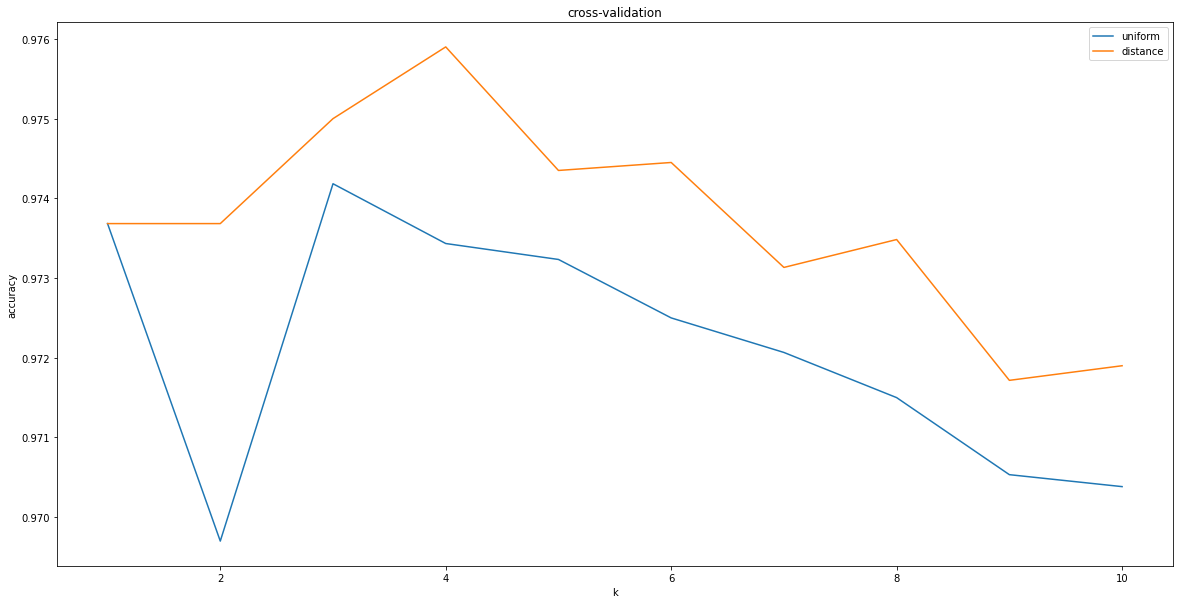

In [34]:
x = meta_list

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, cos_accuracy, label='uniform')  # Plot some data on the axes.
ax.plot(x, dist_accuracy, label='distance')
ax.set_ylabel('accuracy')  # Add an x-label to the axes.
ax.set_xlabel('k')  # Add a y-label to the axes.
ax.set_title("cross-validation")  # Add a title to the axes.
ax.legend()  # Add a legend.


#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор.

   Из графика видно, что точность лучше для взвешенного алгоритма, при k=4 максимальная.


2. Сравните результаты взвешенного алгоритма с невзвешенным. Объясните разницу/отсутствие разницы в результатах.

   Заметим, что вид графиков отличается для невзвешенного и взвешенного алгоритма отличается. Например, в последнем случае наблюдается заметное падение точности с увеличением k. Также в последнем случае не будет такого, что при чётным k точность оказывается хуже, так как выбор происходит с учётом косинусных расстояний между объектами и почти всюду однозначный. Из-за этого также лучше максимальная точность для взвешенного алгоритма.

### 4. Применение алгоритма и интерпретация ошибок (3 балла)

1. Примените лучший алгоритм к исходной обучающей и тестовой выборке и посчитайте точность классификации. Сравните с точностью по кросс-валидации. Опишите ваши результаты.

In [35]:
k = 4
weight = 'distance'
metric = 'cosine'
algoritm = 'my_own'

In [36]:
clf = BatchedKNNClassifier(n_neighbors=k, algorithm=algorithm, metric=metric, weights=weight, batch_size=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [37]:
print("Train score = ", dist_accuracy[3])
print("Test score = ",accuracy_score(y_test, y_pred))

Train score =  0.9759000000000001
Test score =  0.9752


 ## Поразительный результат!
 Крайне неожиданным является тот факт, что результаты отличаются так незначительно.

2. Постройте и проанализируйте матрицу ошибок (confusion matrix), используйте функцию `sklearn.metrics.confusion_matrix`. Визуализируйте несколько объектов из тестовой выборки, на которых были допущены ошибки. Проанализируйте и укажите их общие черты.

In [38]:
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[ 977,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1129,    3,    1,    0,    0,    2,    0,    0,    0],
       [   8,    0, 1009,    1,    1,    0,    0,    8,    5,    0],
       [   0,    1,    3,  976,    1,   12,    0,    4,    9,    4],
       [   2,    1,    0,    0,  946,    0,    6,    2,    0,   25],
       [   4,    0,    0,    9,    1,  863,    7,    1,    4,    3],
       [   3,    3,    0,    0,    1,    3,  948,    0,    0,    0],
       [   2,   10,    4,    0,    1,    0,    0,  998,    0,   13],
       [   7,    1,    2,    9,    3,    3,    5,    4,  936,    4],
       [   7,    7,    2,    5,    7,    3,    1,    4,    3,  970]],
      dtype=int64)

Выведем индексы неугаданных изображений

In [40]:
indices = np.where((y_test - y_pred) != 0)[0]
indices

array([ 115,  241,  247,  320,  321,  358,  444,  445,  447,  448,  464,
        495,  551,  582,  591,  628,  707,  740,  839,  881,  924,  938,
        939,  947,  951,  956,  957, 1014, 1062, 1089, 1107, 1112, 1114,
       1178, 1192, 1226, 1232, 1242, 1247, 1260, 1290, 1299, 1319, 1325,
       1393, 1422, 1425, 1494, 1500, 1522, 1530, 1549, 1553, 1559, 1681,
       1695, 1721, 1737, 1778, 1790, 1865, 1878, 1901, 1955, 1970, 1984,
       2044, 2052, 2093, 2098, 2105, 2109, 2118, 2129, 2130, 2135, 2182,
       2224, 2237, 2266, 2272, 2293, 2298, 2299, 2339, 2387, 2395, 2406,
       2408, 2447, 2454, 2488, 2533, 2607, 2648, 2654, 2721, 2758, 2771,
       2810, 2863, 2896, 2901, 2927, 2939, 2952, 2953, 3005, 3062, 3073,
       3117, 3333, 3336, 3369, 3405, 3475, 3490, 3503, 3520, 3549, 3558,
       3559, 3597, 3629, 3702, 3780, 3796, 3808, 3811, 3838, 3853, 3893,
       3902, 3926, 3941, 3976, 3985, 4007, 4017, 4075, 4078, 4145, 4163,
       4176, 4194, 4199, 4212, 4224, 4289, 4306, 43

In [41]:
bad = [X_test[7545].reshape((28,28)), 
    X_test[9905].reshape((28,28)), 
    X_test[8520].reshape((28,28)), 
    X_test[9839].reshape((28,28)),
    X_test[9211].reshape((28,28)),
    X_test[9634].reshape((28,28)), 
    X_test[3976].reshape((28,28)), 
    X_test[4017].reshape((28,28))]

Так выглядят неугаданные объекты:

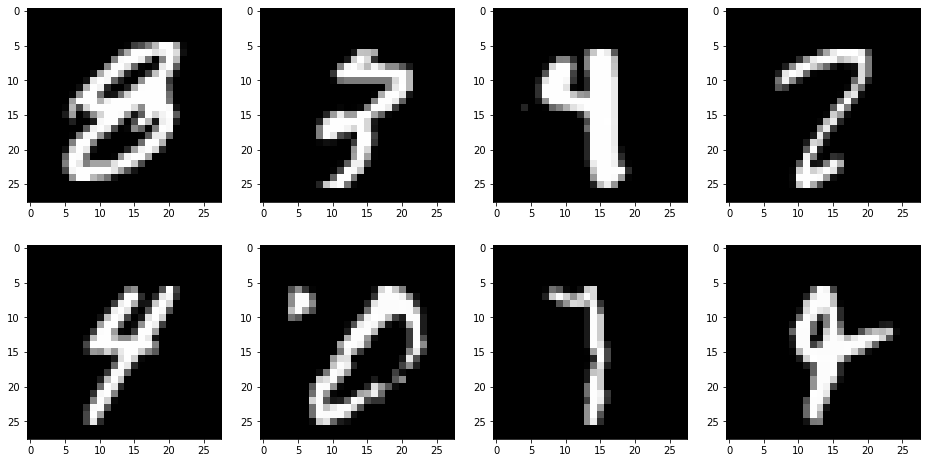

In [42]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for ax_, img_ in zip(chain.from_iterable(axes), bad):
    ax_.imshow(img_, cmap='gray')
#ax.imshow(X_test[7432].reshape((28,28)), cmap='gray')

In [43]:
good = [X_test[i].reshape((28,28)) for i in range(8)]

И гораздо разборчивее выглядят угаданные изображения:

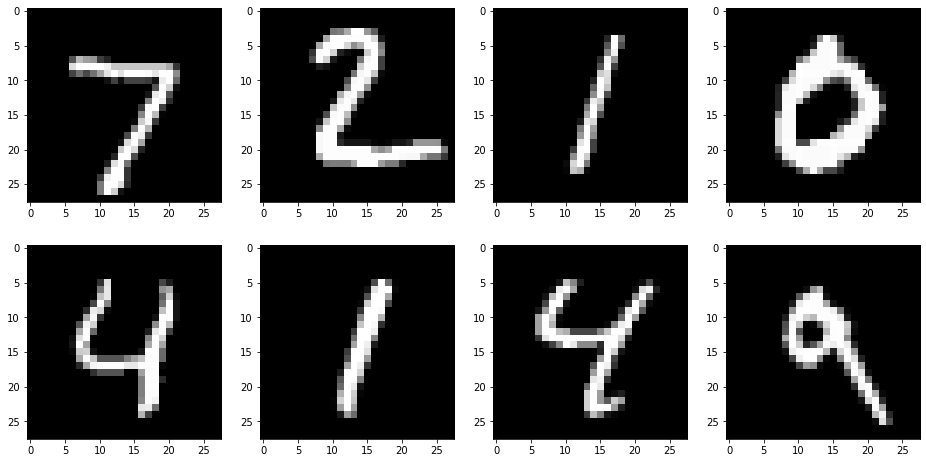

In [44]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for ax_, img_ in zip(chain.from_iterable(axes), good):
    ax_.imshow(img_, cmap='gray')
#ax.imshow(X_test[7432].reshape((28,28)), cmap='gray')

Даже человеку сложно понять, какие цифры изображены на верхней выборке. Напротив, на нижней выборке всё понятно сразу. Из этого можно сделать вывод, что ошибки обусловлены каллиграфией.